            Date        Open        High         Low       Close   Adj Close  \
0     2002-07-01    2.087878    2.170707    2.072222    2.149494    1.439879   
1     2002-07-02    2.148484    2.179797    2.108585    2.118181    1.418903   
2     2002-07-03    2.129797    2.129797    2.052525    2.071212    1.387440   
3     2002-07-04    2.061616    2.098989    2.040909    2.061111    1.380674   
4     2002-07-05    2.053030    2.090909    2.053030    2.073737    1.389131   
...          ...         ...         ...         ...         ...         ...   
5532  2024-10-14  286.100006  289.200012  284.649994  285.700012  285.700012   
5533  2024-10-15  287.149994  289.450012  285.750000  288.850006  288.850006   
5534  2024-10-16  288.149994  291.049988  284.750000  285.700012  285.700012   
5535  2024-10-17  286.049988  287.899994  281.700012  284.549988  284.549988   
5536  2024-10-18  282.899994  287.799988  277.799988  287.149994  287.149994   

        Volume  
0     66107844  
1    

C:\Users\bharg\Downloads\anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.09022e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


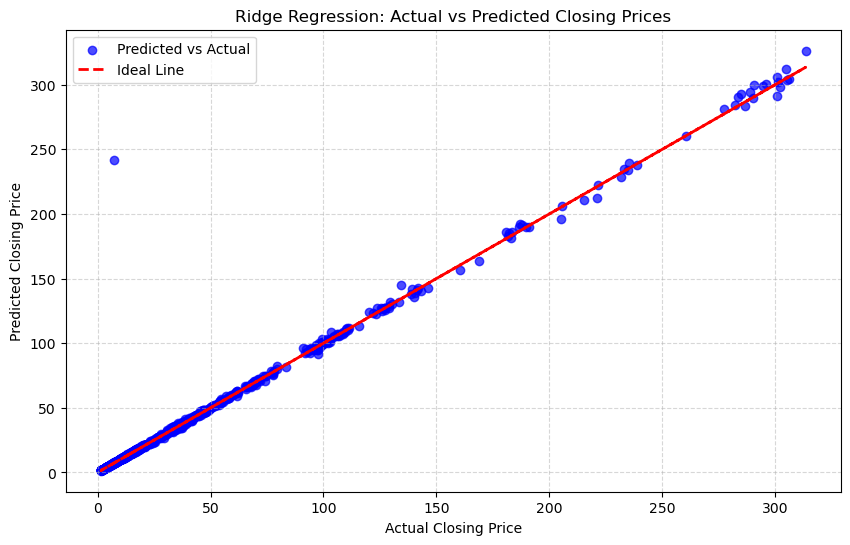

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge  # Import Ridge for Ridge Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('BEL_stock_data_newone.csv')  # Ensure this path is correct

# Preview the dataset
print(df)

# Feature Engineering
df['Price_Change'] = df['Close'] - df['Open']  # Price change
df['Rolling_Avg_5'] = df['Close'].rolling(window=5).mean()  # 5-day rolling average
df['Rolling_Avg_10'] = df['Close'].rolling(window=10).mean()  # 10-day rolling average
df['Volatility'] = df['Close'].rolling(window=10).std()  # 10-day volatility

# Drop rows with NaN values from rolling calculations
df = df.dropna()

# Define the target variable (next day's closing price)
df['Target'] = df['Close'].shift(-1)  # Shift the close prices to create target
df = df.dropna()  # Drop last row with NaN target

# Select features and target
features = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Rolling_Avg_5', 'Rolling_Avg_10', 'Volatility']
X = df[features]
y = df['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Algorithms
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 3. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 4. Ridge Regression
ridge_model = Ridge(alpha=1.0)  # Initialize Ridge with regularization parameter alpha=1.0
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv('BEL_stock_data_newone.csv')  # Ensure this path is correct

# Feature Engineering
df['Price_Change'] = df['Close'] - df['Open']  # Price change
df['Rolling_Avg_5'] = df['Close'].rolling(window=5).mean()  # 5-day rolling average
df['Rolling_Avg_10'] = df['Close'].rolling(window=10).mean()  # 10-day rolling average
df['Volatility'] = df['Close'].rolling(window=10).std()  # 10-day volatility

# Drop rows with NaN values from rolling calculations
df = df.dropna()

# Define the target variable (next day's closing price)
df['Target'] = df['Close'].shift(-1)  # Shift the close prices to create target
df = df.dropna()  # Drop last row with NaN target

# Select features and target
features = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Rolling_Avg_5', 'Rolling_Avg_10', 'Volatility']
X = df[features]
y = df['Target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Ridge Regression': Ridge(alpha=1.0)
}

# Function to calculate adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Performance metrics for
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, n=len(y_test), p=X_test.shape[1])
    
    # Print results
    print(f"{model_name} Performance Metrics:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R²): {r2:.4f}")
    print(f"  Adjusted R-squared: {adj_r2:.4f}\n")


Linear Regression Performance Metrics:
  Mean Absolute Error (MAE): 0.7928
  Mean Squared Error (MSE): 51.4147
  Root Mean Squared Error (RMSE): 7.1704
  R-squared (R²): 0.9798
  Adjusted R-squared: 0.9797

Random Forest Performance Metrics:
  Mean Absolute Error (MAE): 0.9801
  Mean Squared Error (MSE): 38.4608
  Root Mean Squared Error (RMSE): 6.2017
  R-squared (R²): 0.9849
  Adjusted R-squared: 0.9848

Decision Tree Performance Metrics:
  Mean Absolute Error (MAE): 1.3603
  Mean Squared Error (MSE): 123.9047
  Root Mean Squared Error (RMSE): 11.1312
  R-squared (R²): 0.9514
  Adjusted R-squared: 0.9510

Ridge Regression Performance Metrics:
  Mean Absolute Error (MAE): 0.7928
  Mean Squared Error (MSE): 51.4097
  Root Mean Squared Error (RMSE): 7.1701
  R-squared (R²): 0.9798
  Adjusted R-squared: 0.9797



C:\Users\bharg\Downloads\anaconda\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.09022e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
